            Introduction About the Data :

            The dataset The goal is to predict price of given Gem (Regression Analysis).

            There are 10 independent variables (including id):

            id : unique identifier of each diamond

            carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

            cut : Quality of Diamond Cut

            color : Color of Diamond

            clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics         under 10-power magnification.

            depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

            table : A diamond's table is the facet which can be seen when the stone is viewed face up.

            x : Diamond X dimension

            y : Diamond Y dimension

            x : Diamond Z dimension

            Target variable:

            price: Price of the given Diamond.


            Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

In [2]:
import pandas as pd

In [3]:
df_data=pd.read_csv(r'C:\Users\abhishek.bhadouriya\Documents\projects\gempriceprediction\notebook\data\gemstone.csv')

In [4]:
df_data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


Drop id column as it is statistically insignificant

In [6]:
df_data.drop(['id'],axis=1,inplace=True)

Check for missing values

In [7]:
df_data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No missing values in Data

Check for Duplicate Values in dataset

In [8]:
df_data.duplicated().sum()

0

No Duplicated Data found

Descriptive Statistics

In [9]:
num_col=list(df_data.columns[df_data.dtypes!='object'])
cat_col=list(df_data.columns[df_data.dtypes=='object'])
print('List of Numerical columns is: ', num_col)
print('List of Categorical columns is: ', cat_col)

List of Numerical columns is:  ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
List of Categorical columns is:  ['cut', 'color', 'clarity']


In [10]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [11]:
df_data.describe(include=['O']).T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


All Unique values in Dataset

In [12]:
df_data.nunique()

carat       248
cut           5
color         7
clarity       8
depth       153
table       108
x           522
y           521
z           349
price      8738
dtype: int64

Cut, Color and Clarity are ordinal features in dataset.

**Univariate Analysis with Visualisation**



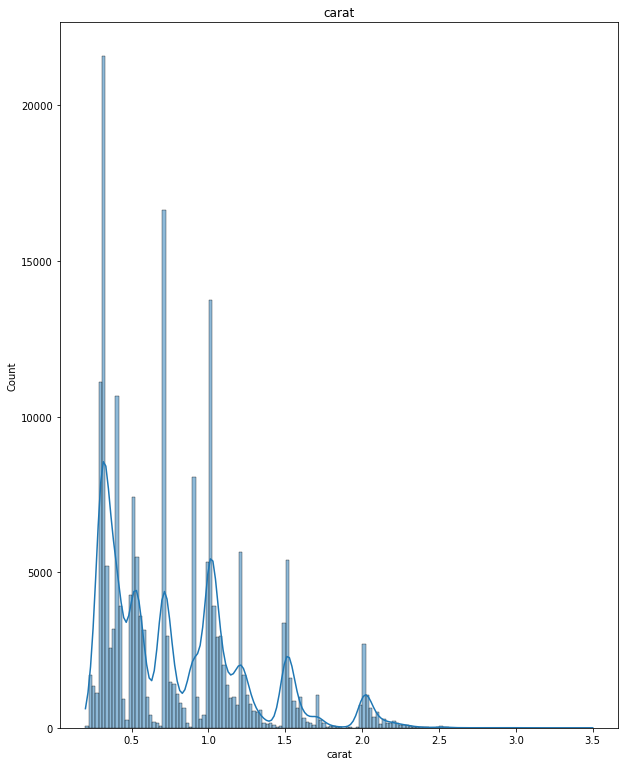

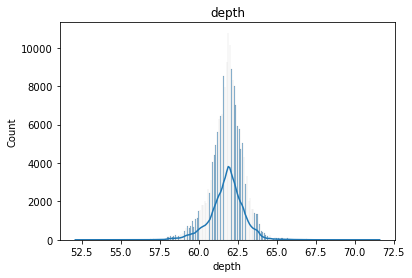

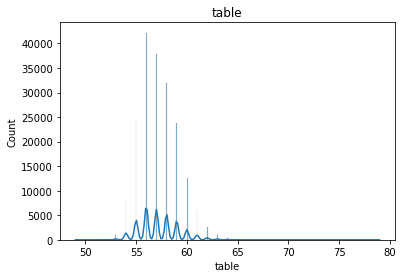

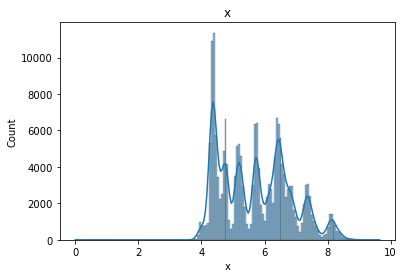

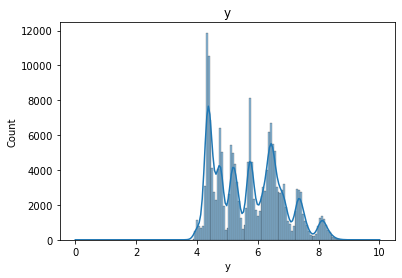

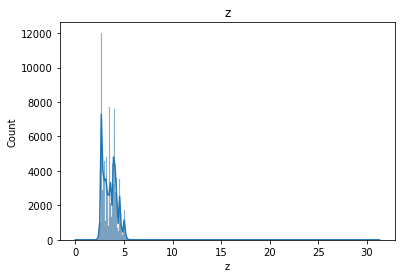

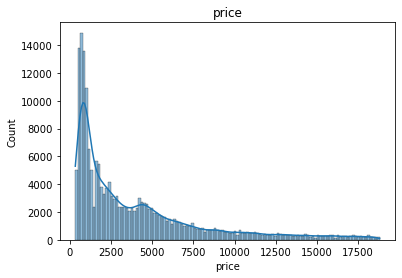

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x=1
for col in num_col:
    sns.histplot(data=df_data, x=col, kde=True)
    plt.title(col)
    print('\n')
    plt.show()

**Univariate analysis for categorical variables**

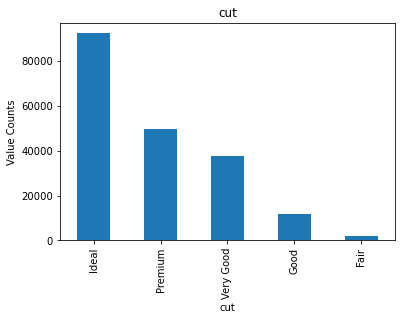

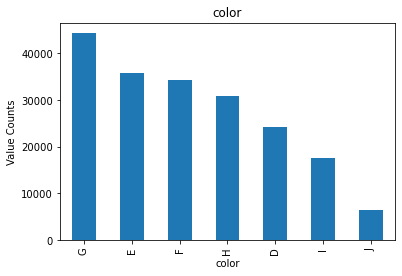

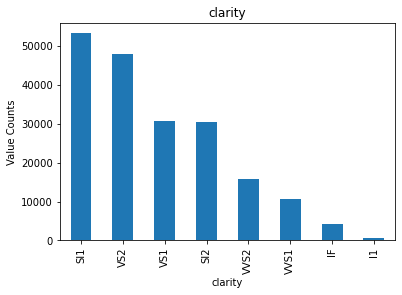

In [14]:
for col in cat_col:
    df_data[col].value_counts().plot(kind='bar', xlabel=col, ylabel='Value Counts', title=col)
    print('\n')
    plt.show()

                                                        **Bivariate Analysis with Visualisation**

**Correlation heatmap**

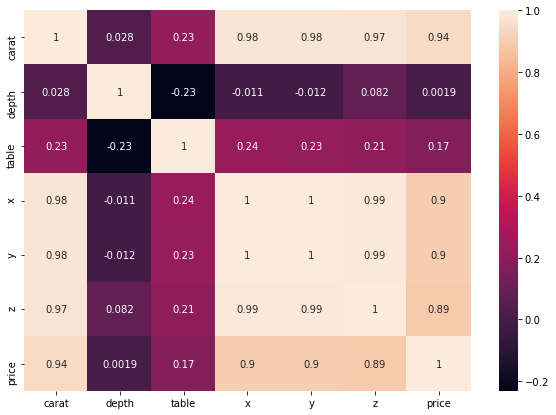

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df_data.corr(),annot=True)
plt.show()

**Pairplot**

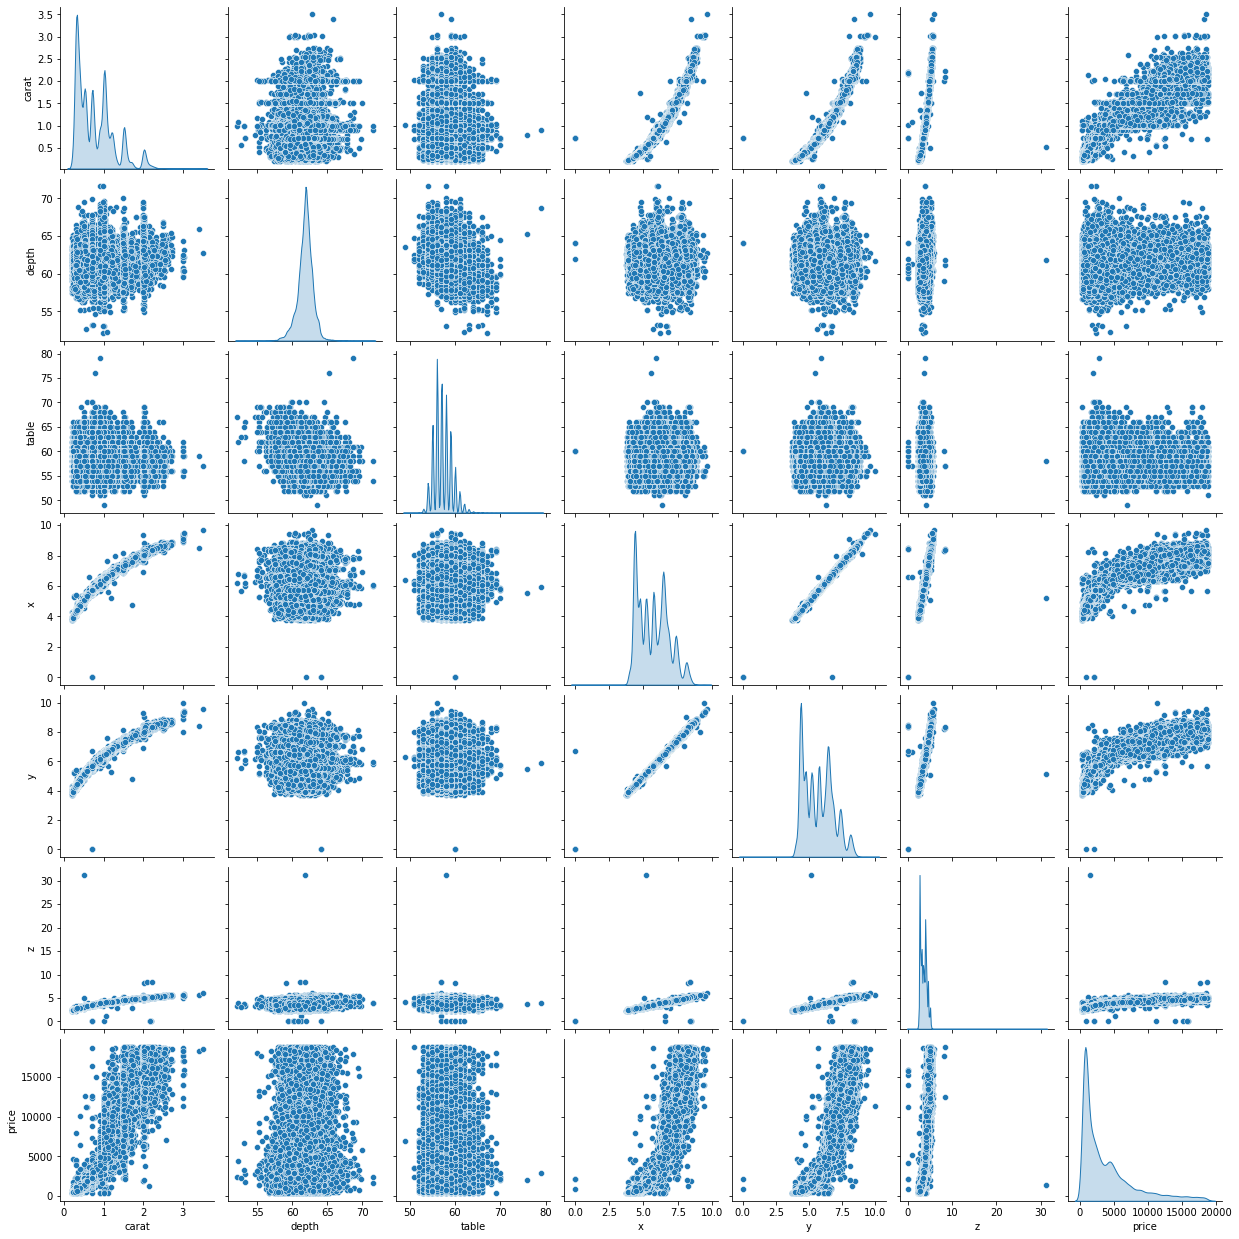

In [16]:
sns.pairplot(df_data, diag_kind='kde')
plt.show()

**Categorical Features vs Target Feature Price Boxplot**

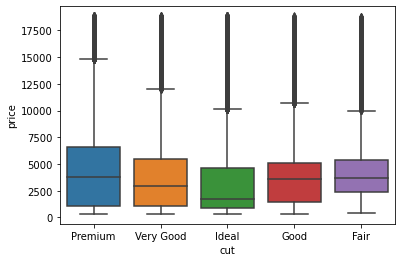

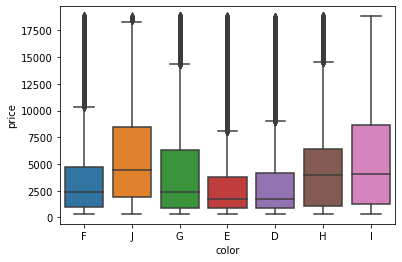

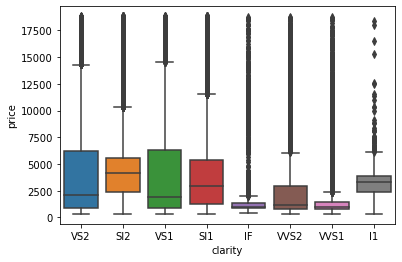

In [17]:
for col in cat_col:
    sns.boxplot(data=df_data, x=col, y='price')
    plt.show()

                                Ordinal Mapping of categorical features

It is observed that the categorical variables 'cut', 'color' and 'clarity' are ordinal in nature

Creating Mapper for each categorical variable

In [18]:
cut_mapper = {"Fair":1, "Good":2, "Very Good":3 , "Premium":4 ,"Ideal":5}
clarity_mapper = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_mapper = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

**Applying the mapper to the dataframe**

In [20]:
df_data['cut']=df_data['cut'].replace(cut_mapper)
df_data['clarity']=df_data['clarity'].replace(clarity_mapper)
df_data['color']=df_data['color'].replace(color_mapper)

In [21]:
df_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


                                Mutual Information Scores

**Seperating X and Y**

In [23]:
X=df_data.drop(['price'],axis=1)
y=df_data['price']

**Calculating Mutual Information scores for regression**

In [24]:
from sklearn.feature_selection import mutual_info_regression
mi_scores=mutual_info_regression(X,y,random_state=42)

In [25]:
mi_scores=pd.Series(mi_scores,name='MI Scores', index=X.columns)
mi_scores=mi_scores.sort_values(ascending=False)

In [28]:
import numpy as np
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width=np.arange(len(scores))
    ticks=list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

**Visualizing Mutual Information Scores**

carat      1.825115
x          1.674011
y          1.666632
z          1.615992
clarity    0.397911
color      0.285518
table      0.109664
cut        0.092104
depth      0.045643
Name: MI Scores, dtype: float64


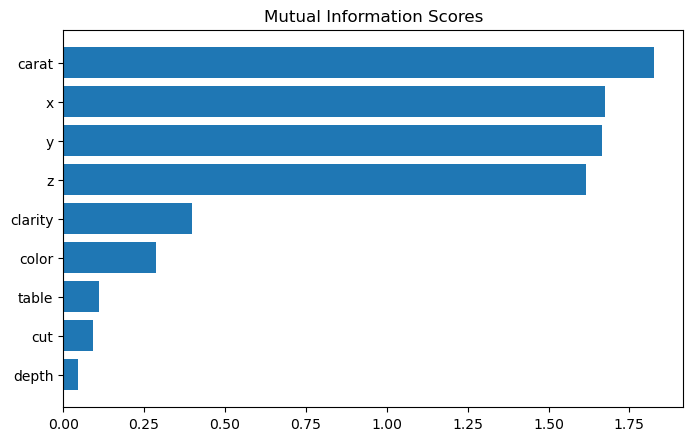

In [29]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)